# Drug Discovery

* Finding more effective drug in high BP & Cholesterol by using Age & Na_to_K

In [2]:
import pandas as pd

# Data collection

In [3]:
file="D:\Data centr\Exel_data\int data\Drug_data\drug200.csv"
drug=pd.read_csv(file)
drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


# Data Analysis
* Column-Rows

In [4]:
print(drug.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY


* Column ways

In [5]:
print(drug.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


# Data Statistics 
* Transpose

In [6]:
drug.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


* Check Null Data

In [7]:
drug.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
import matplotlib.pyplot as pyplt
import seaborn as sb

# Graph Visualization:

# Histogram
Histograms are used to visualize the distribution of a numerical variable.

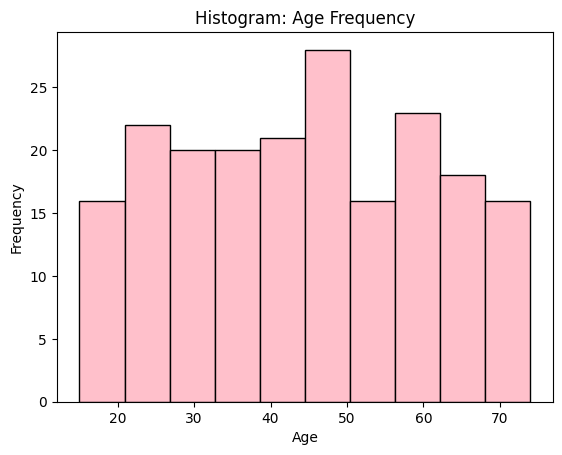

In [9]:
pyplt.hist(drug['Age'],bins=10,color='pink', edgecolor='black')
pyplt.title('Histogram: Age Frequency')
pyplt.xlabel('Age')
pyplt.ylabel('Frequency')
pyplt.show()

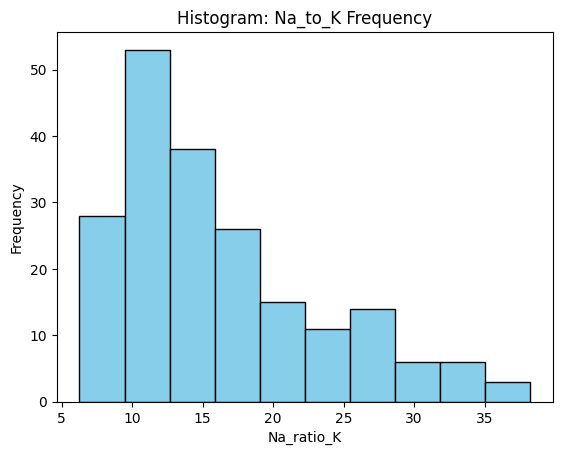

In [10]:
pyplt.hist(drug['Na_to_K'],bins=10,color='skyblue', edgecolor='black')
pyplt.title('Histogram: Na_to_K Frequency')
pyplt.xlabel('Na_ratio_K')
pyplt.ylabel('Frequency')
pyplt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Na_to_K'}>]], dtype=object)

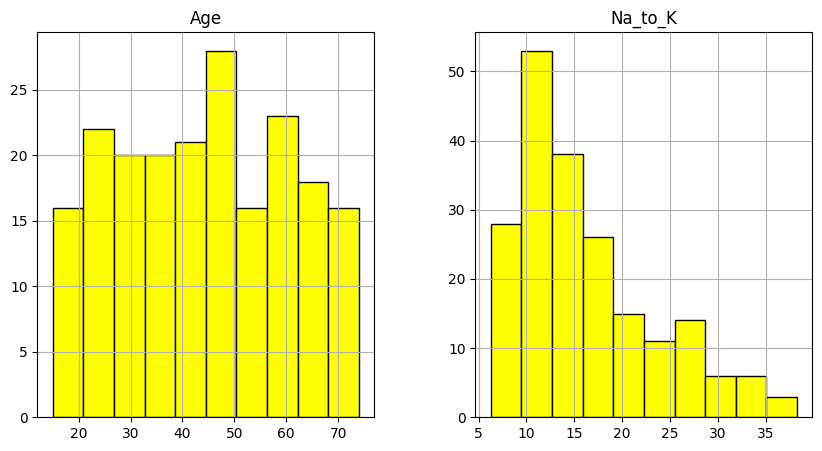

In [11]:
drug.hist(figsize=(10,5),bins=10, color='yellow',edgecolor='black')

# Scatter Plot
Scatter plots are used to visualize the relationship between two variables

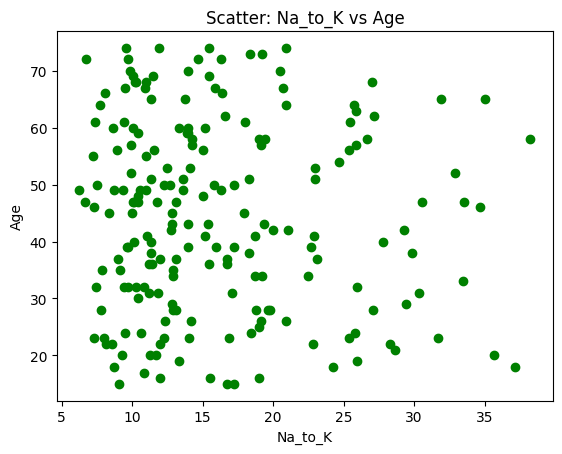

In [12]:
pyplt.scatter(drug['Na_to_K'], drug['Age'], color='green')
pyplt.title("Scatter: Na_to_K vs Age")
pyplt.xlabel("Na_to_K")
pyplt.ylabel("Age")
pyplt.show()


# Distribution Plot
Distribution Plot helps visualize the distribution of a single numeric column

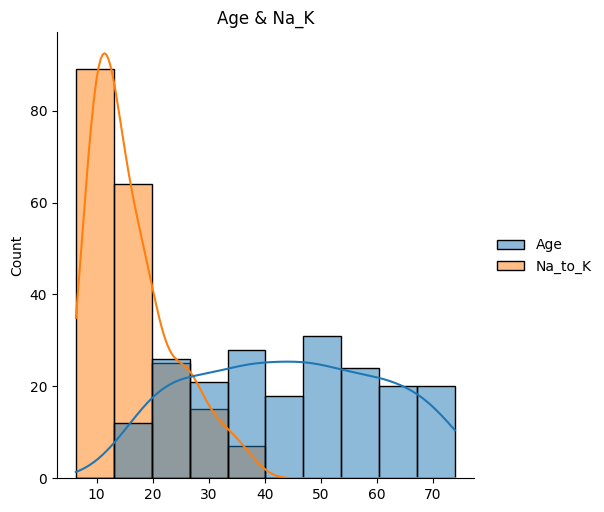

In [13]:
sb.displot(drug,kde=True)   
pyplt.title("Age & Na_K")
pyplt.show()  

# Correlation Matrix
figuring out how different variables are related to each other

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
drug_encoded=drug.copy()
le=LabelEncoder()
for col in ["Sex","BP","Cholesterol","Drug"]:
    drug_encoded[col]=le.fit_transform(drug_encoded[col])

corr_matrix=drug_encoded.corr()
print(corr_matrix)

                  Age       Sex        BP  Cholesterol   Na_to_K      Drug
Age          1.000000  0.102027  0.054212    -0.068234 -0.063119 -0.004828
Sex          0.102027  1.000000 -0.007814    -0.008811 -0.125008 -0.098573
BP           0.054212 -0.007814  1.000000    -0.137552 -0.149312  0.372868
Cholesterol -0.068234 -0.008811 -0.137552     1.000000  0.010000  0.055629
Na_to_K     -0.063119 -0.125008 -0.149312     0.010000  1.000000  0.589120
Drug        -0.004828 -0.098573  0.372868     0.055629  0.589120  1.000000


# Count Plot
visualize quantity of each catogary have

<Axes: ylabel='count'>

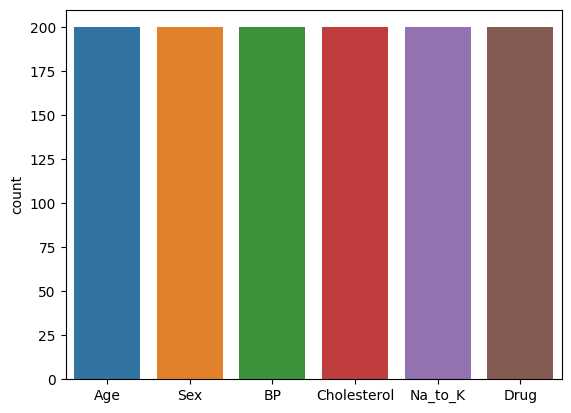

In [16]:
sb.countplot(drug_encoded)

# HeatMap
Heatmaps are useful for visualizing correlation matrices or comparing the intensities of different values across variables.

<Axes: >

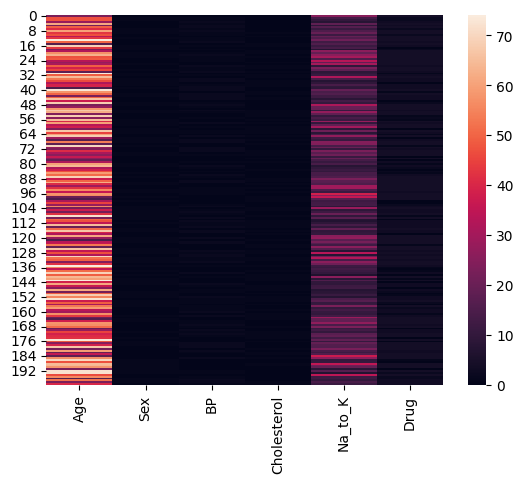

In [17]:
sb.heatmap(drug_encoded)

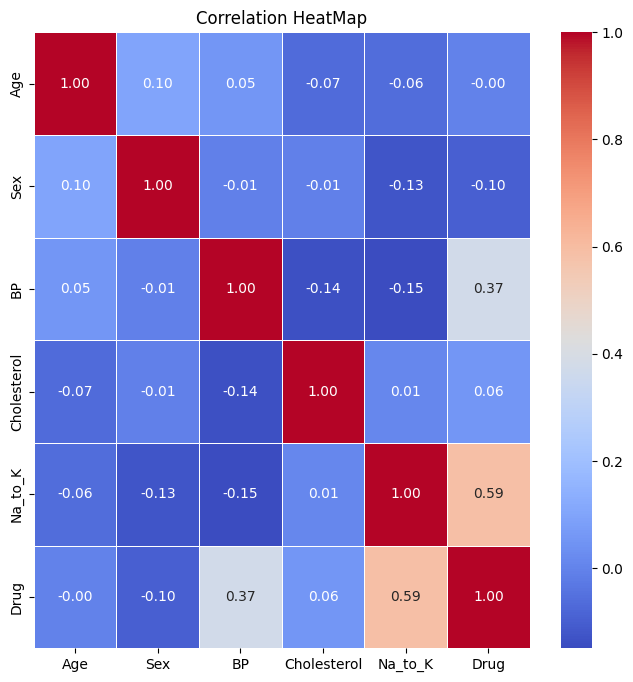

In [18]:
pyplt.figure(figsize=(8,8))
sb.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5,linecolor='white')
pyplt.title("Correlation HeatMap")
pyplt.show()

# Pair Plots
Pair plots are useful to visualize relationships between all pairs of variables.

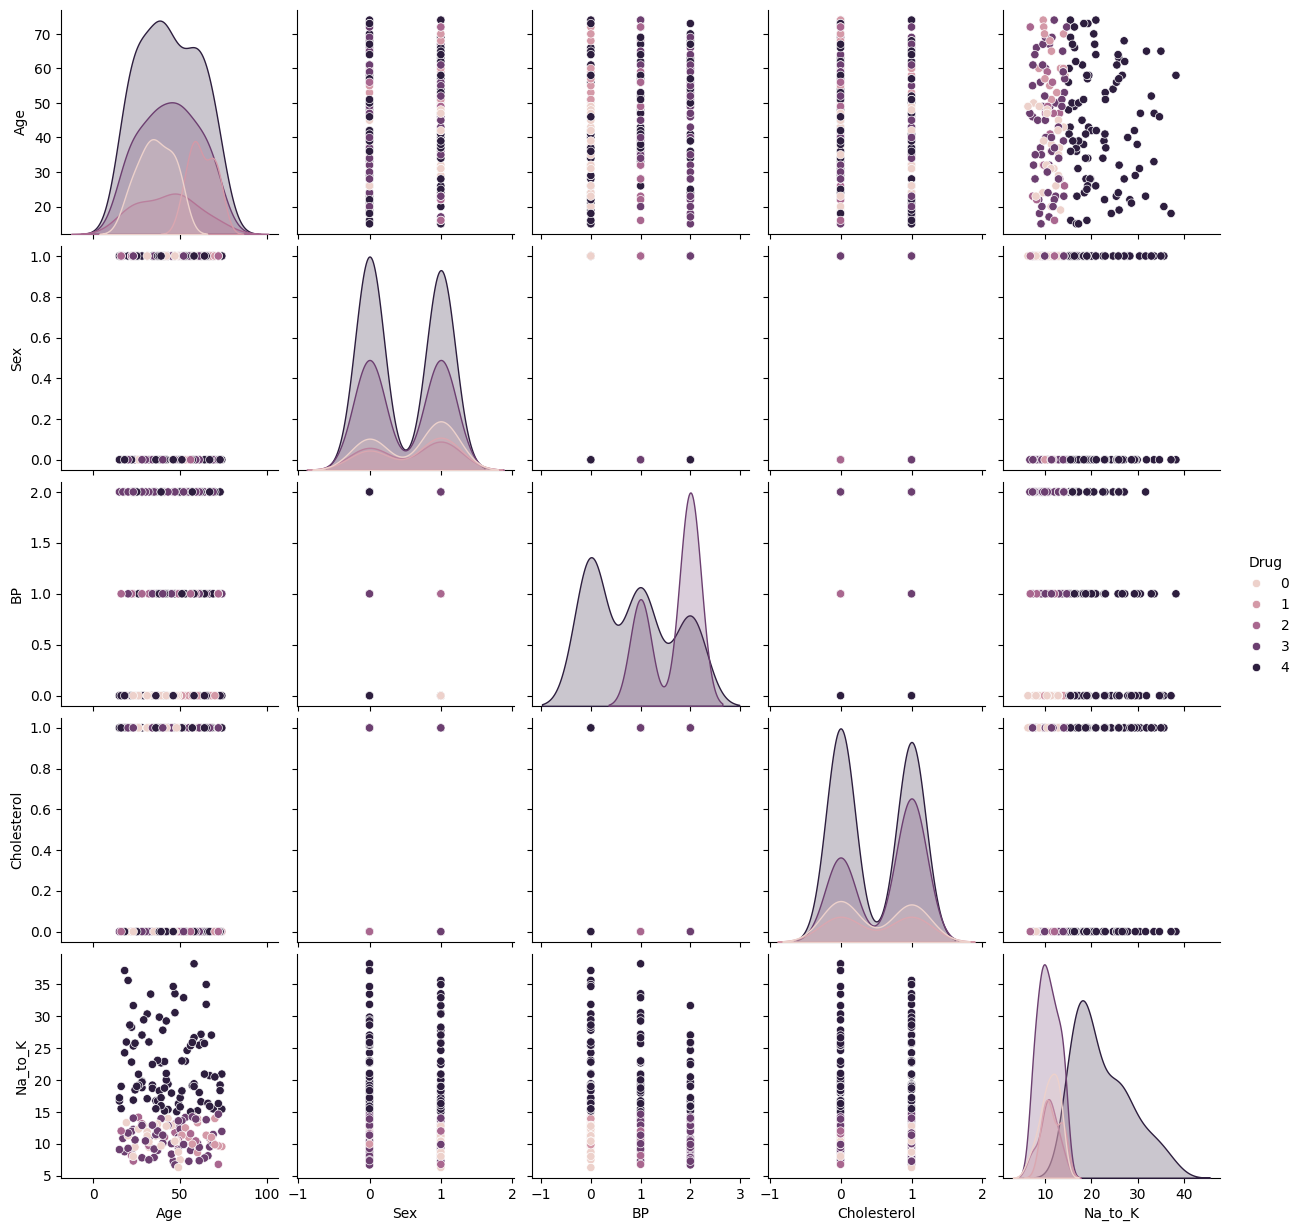

In [19]:
sb.pairplot(drug_encoded,hue='Drug')

# Data Preprocessing

* Fill null data using mean & mode

In [20]:
drug['Na_to_K'].fillna(drug["Na_to_K"].mean(),inplace=True)
drug["Cholesterol"].fillna(drug["Cholesterol"].mode()[0],inplace=True)

C:\Users\himan\AppData\Local\Temp\ipykernel_10372\3968748997.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  drug['Na_to_K'].fillna(drug["Na_to_K"].mean(),inplace=True)
C:\Users\himan\AppData\Local\Temp\ipykernel_10372\3968748997.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

# Normalization:
* Convert Non Numeric into Numeric data

In [21]:
le = LabelEncoder()
drug['BP'] = le.fit_transform(drug['BP'])
drug['Cholesterol'] = le.fit_transform(drug['Cholesterol'])

* use algorithms like gradient descent and k-NN.
* Standardization (Mean = 0, Standard Deviation = 1):

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
drug['Na_to_K'] = scaler.fit_transform(drug[['Na_to_K']])
print(drug.head())

   Age Sex  BP  Cholesterol   Na_to_K   Drug
0   23   F   0            0  1.286522  drugY
1   47   M   1            0 -0.415145  drugC
2   47   M   1            0 -0.828558  drugC
3   28   F   2            0 -1.149963  drugX
4   61   F   1            0  0.271794  drugY


# Feature Selection
Goal Achievement Technique:
* Correlation matrix for numerical variables
* Feature importance from tree-based models



# Using a Tree-Based Model
* Finding Important Feature

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
x = drug_encoded.drop('Drug', axis=1)  # Features
y = drug_encoded['Drug']  # Target

In [26]:
# Train a Decision Tree model
model = DecisionTreeClassifier()
model.fit(x, y)

# Get feature importance from the model
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': model.feature_importances_})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

       Feature  Importance
4      Na_to_K    0.476282
2           BP    0.265718
0          Age    0.135954
3  Cholesterol    0.122046
1          Sex    0.000000


# Visualize Feature Importance:
Barplot

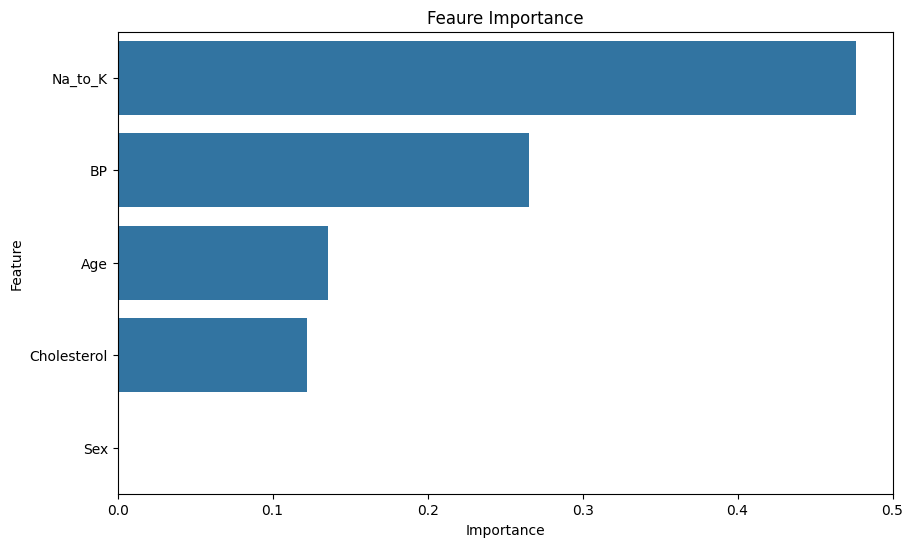

In [27]:
pyplt.figure(figsize=(10,6))
sb.barplot(x="Importance",y="Feature",data=feature_importance)
pyplt.title("Feaure Importance")
pyplt.show()

In [28]:
# Select top n important features
top_features = feature_importance['Feature'].head(5)  # Select top 5 features

# Keep only the top features in your dataset
X_selected = x[top_features]


# Data Split- Training & Testing
* x input feature
* y output feature

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [31]:
x_test

,Age,Sex,BP,Cholesterol,Na_to_K
96,58,0,1,0,38.247
5,22,0,2,0,8.607
116,67,1,2,1,9.514
35,46,1,2,1,7.285
183,36,0,0,1,15.490
160,30,0,2,0,10.443
54,68,0,0,1,10.189
134,42,0,0,0,21.036
90,62,1,2,0,16.594
191,23,1,0,0,8.011


In [32]:
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
86,51,0,2,0,13.597
182,20,0,1,1,11.686
69,18,0,0,1,24.276
125,19,0,0,1,25.969
42,50,1,2,1,15.790
...,...,...,...,...,...
50,58,0,0,0,19.416
184,18,0,0,0,37.188
165,38,1,1,0,18.295
7,41,1,1,0,11.037


In [33]:
y_test

96     4
5      3
116    3
35     3
183    4
160    3
54     1
134    4
90     4
191    0
139    3
142    1
177    4
26     4
89     4
140    0
171    3
23     4
132    3
37     3
151    1
28     4
85     1
93     4
174    0
75     4
18     2
105    3
121    4
130    4
33     4
46     0
168    4
169    0
11     4
166    4
81     3
111    3
67     3
147    0
Name: Drug, dtype: int32

In [34]:
y_train

86     3
182    3
69     4
125    4
42     4
      ..
50     4
184    4
165    4
7      2
70     1
Name: Drug, Length: 160, dtype: int32

# Model Selection & Evalution

* Classification Models-  Random Forest classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error,precision_score,recall_score,f1_score,roc_auc_score

from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

In [36]:
# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [37]:
# Make predictions
y_pred = clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [38]:
# Calculate ROC-AUC Score (for binary/multiclass classification)
# Adjust based on the number of classes (in this case, 5 classes)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])  
y_prob = clf.predict_proba(x_test)
roc_auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')

In [39]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC Score: 1.0


In [40]:
# ROC curve for each class
fpr = {}
tpr = {}
roc_auc_value = {}

for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc_value[i] = auc(fpr[i], tpr[i])

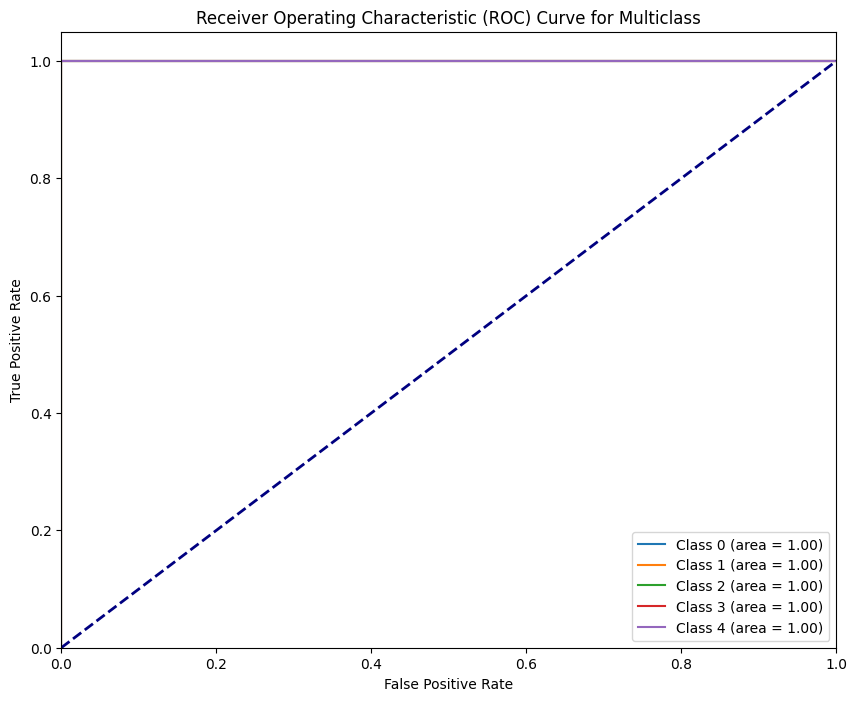

In [41]:
# Plot the ROC curve for each class
pyplt.figure(figsize=(10, 8))
for i in range(y_test_bin.shape[1]):
    pyplt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc_value[i]:0.2f})')

pyplt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
pyplt.xlim([0.0, 1.0])
pyplt.ylim([0.0, 1.05])
pyplt.xlabel('False Positive Rate')
pyplt.ylabel('True Positive Rate')
pyplt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
pyplt.legend(loc="lower right")
pyplt.show()

* Regression Models

In [42]:
from sklearn.linear_model import Ridge

In [43]:
# Train a Ridge Linear Regression
ridge_reg=Ridge(alpha=1.0)
ridge_reg.fit(x_train,y_train)

Ridge()

In [44]:
# Make prediction
y_pred_reg=ridge_reg.predict(x_test)

mse=mean_squared_error(y_test,y_pred_reg)
print(f"Regression Mean Squared Error: {mse}")

Regression Mean Squared Error: 0.8063417086109185


* Clustering Models- K-Means

In [45]:
from sklearn.cluster import KMeans

In [46]:
# Apply K-Means clustering (assuming you have numeric features)
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

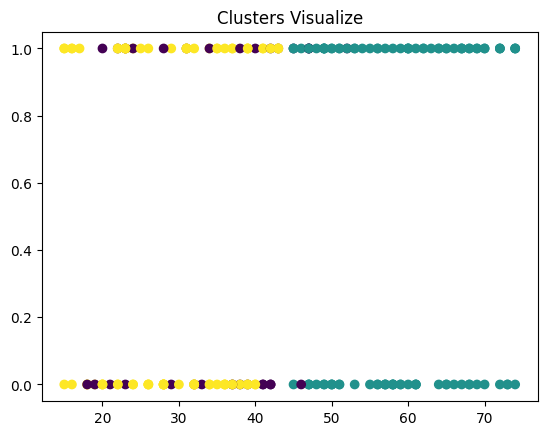

In [47]:
# Predict clusters
clusters = kmeans.predict(x)

# Visualize clusters (if the data is 2D)
pyplt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=clusters, cmap='viridis')
pyplt.title("Clusters Visualize")
pyplt.show()


# Model Tuning
more efficient than Grid Search for large parameter spaces.

* Grid Search for hyperparameter tuning
guarantees the best combination from the grid

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid={
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [50]:
grid_search=GridSearchCV(estimator=clf,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)

In [51]:
# Train the model using Grid Search
grid_search.fit(x_train, y_train)
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: 0.9875


In [52]:
# Test the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print(f"Test Set Accuracy: {test_score}")

Test Set Accuracy: 1.0


* Random Search for hyperparameter tuning.

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
# Apply Random Search with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter=20, cv=5, n_jobs=-1, verbose=2)

In [55]:
# Train the model using Random Search
random_search.fit(x_train, y_train)
print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Best Cross-Validation Score: {random_search.best_score_}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Best Cross-Validation Score: 0.99375


In [56]:
# Test the model with the best hyperparameters on the test set
best_model_random = random_search.best_estimator_
test_score_random = best_model_random.score(x_test, y_test)
print(f"Test Set Accuracy: {test_score_random}")

Test Set Accuracy: 1.0


* Cross-validation Helps evaluate the model’s performance across different subsets of data

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_model, x_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")


Cross-Validation Scores: [1.      0.96875 1.      1.      0.96875]
Mean CV Score: 0.9875


In [59]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = best_model.predict(x_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



# Model Deployment
* Flask Framework

In [60]:
import joblib

In [61]:
joblib.dump(best_model, 'drug_model.pkl')

['drug_model.pkl']

In [62]:
print(set(y_train))  # Check unique values in y_train
print(set(y_test))   # Check unique values in y_test

{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4}


# Fully Connected Neural Network model

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [64]:
model_tens = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

c:\Users\himan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
model_tens.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print(model_tens.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,869 (19.02 KB)

 Trainable params: 4,869 (19.02 KB)

 Non-trainable params: 0 (0.00 B)

None


In [66]:
history=model_tens.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.2)
test_loss, test_accuracy = model_tens.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Save the model
model_tens.save("drug_model.h5")

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.1698 - loss: 7.9977 - val_accuracy: 0.0625 - val_loss: 2.7452
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2271 - loss: 6.1556 - val_accuracy: 0.5938 - val_loss: 1.8415
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3906 - loss: 3.8402 - val_accuracy: 0.5938 - val_loss: 1.7506
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2052 - loss: 4.9186 - val_accuracy: 0.6250 - val_loss: 1.9100
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2844 - loss: 5.1432 - val_accuracy: 0.5938 - val_loss: 1.9557
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3427 - loss: 4.3397 - val_accuracy: 0.6562 - val_loss: 1.6248
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3281 - loss: 3.8826 - val_accuracy: 0.6562 - val_loss: 1.4202
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4052 - loss: 3.4578 - val_accuracy: 0.5938 - val_loss: 1.3343


Test Loss: 1.1128759384155273
Test Accuracy: 0.6000000238418579


In [67]:
converter=tf.lite.TFLiteConverter.from_keras_model(model_tens)
tflite_model=converter.convert()

with open('drug_model.tflite','wb') as f:
    f.write(tflite_model)
print(help(tf.lite.TFLiteConverter))

INFO:tensorflow:Assets written to: C:\Users\himan\AppData\Local\Temp\tmpjdj_t141\assets


INFO:tensorflow:Assets written to: C:\Users\himan\AppData\Local\Temp\tmpjdj_t141\assets


Saved artifact at 'C:\Users\himan\AppData\Local\Temp\tmpjdj_t141'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 5), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  1522590788560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1522590790480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1522590791056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1522590790096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1522590789904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1522590791248: TensorSpec(shape=(), dtype=tf.resource, name=None)
Help on class TFLiteConverterV2 in module tensorflow.lite.python.lite:

class TFLiteConverterV2(TFLiteFrozenGraphConverterV2)
 |  TFLiteConverterV2(funcs, trackable_obj=None)
 |  
 |  Converts a TensorFlow model into TensorFlow Lite model.
 |  
 |  Attributes:
 |    optimizations: Experim